# Understanding and creating CICE compatible grids

The aim of this document is to get CICE6 running on the MOM6 1-degree grid! A lot of this is inspired and copied from https://github.com/dpath2o/AFIM/blob/main/src/py/cice_analysis.ipynb, thanks Dan!




In [30]:
# Install libraries
import os
import warnings
import cartopy
import cartopy.crs       as ccrs
import matplotlib.pyplot as plt
import matplotlib        as mpl
import xarray            as xr
import pandas            as pd
import numpy             as np
import metpy.calc        as mpc
from xgcm                    import Grid
from matplotlib.ticker       import MaxNLocator
from datetime                import datetime, timedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable,Divider,Size
from cartopy.mpl.gridliner   import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline
warnings.filterwarnings("ignore")
_ = xr.set_options(display_style='text')

In [22]:
# Read in CICE history grid, 
cice_hist = xr.open_dataset('/Users/noahday/Github/cice-dirs/runs/test/history/iceh_ic.2005-01-01-03600.nc')
cice_hist


#om_grid = xr.open_dataset('/Users/noahday/Github/cice-dirs/input/CICE_data/grid/access-om2_1deg/om2_1deg.nc')
#om_grid
#grid = Grid(cice_hist, coords={'X': {'center': 'xh', 'outer': 'xq'},
#                        'Y': {'center': 'yh', 'outer': 'yq'},
#                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])

<xarray.Dataset>
Dimensions:       (time: 1, d2: 2, nj: 384, ni: 320, nc: 5, nkaer: 5, nf: 12)
Coordinates:
  * time          (time) datetime64[ns] 2005-01-01T01:00:00
    TLON          (nj, ni) float32 ...
    TLAT          (nj, ni) float32 ...
    ULON          (nj, ni) float32 ...
    ULAT          (nj, ni) float32 ...
    NCAT          (nc) float32 ...
    NFSD          (nf) float32 ...
Dimensions without coordinates: d2, nj, ni, nc, nkaer, nf
Data variables: (12/86)
    time_bounds   (time, d2) datetime64[ns] ...
    VGRDa         (nkaer) float32 ...
    tmask         (nj, ni) float32 ...
    blkmask       (nj, ni) float32 ...
    tarea         (nj, ni) float32 ...
    uarea         (nj, ni) float32 ...
    ...            ...
    apeff         (time, nj, ni) float32 ...
    apeff_ai      (time, nj, ni) float32 ...
    fsdrad        (time, nj, ni) float32 ...
    fsdperim      (time, nj, ni) float32 ...
    afsd          (time, nf, nj, ni) float32 ...
    afsdn         (nc, nf, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model, CICE_6.2.0
    comment:      This year has 365 days
    comment2:     File written on model date 20050101
    comment3:     seconds elapsed into model date:   3600
    conventions:  CF-1.0
    history:      This dataset was created on 2022-06-09 at 14:15:12.9
    io_flavor:    io_netcdf

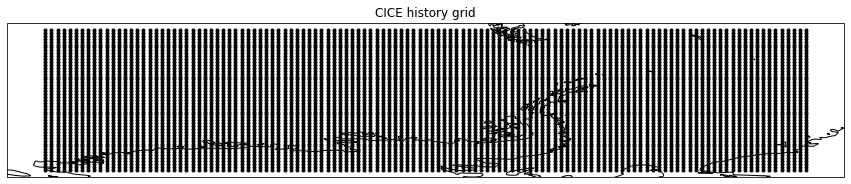

In [23]:
# Plot CICE History grid
fig = plt.figure(figsize=(15,12))
ax  = plt.axes(projection=ccrs.PlateCarree())
lons = -cice_hist.isel(nj=slice(1,50),ni=slice(50,175)).TLON
lats = cice_hist.isel(nj=slice(1,50),ni=slice(50,175)).TLAT
plt.plot(lons,lats,transform=ccrs.PlateCarree(),marker='.',linestyle='none',color='k')
ax.coastlines()
tit_str = 'CICE history grid'.format()
plt.title(tit_str)
plt.show()
plt.close(fig)

In [4]:
cice_grid = xr.open_dataset('/Users/noahday/Github/cice-dirs/input/CICE_data/grid/gx1/global_gx1.bathy.nc')
cice_grid

<xarray.Dataset>
Dimensions:     (nj: 384, ni: 320)
Coordinates:
    TLAT        (nj, ni) float32 ...
    TLON        (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Data variables:
    Bathymetry  (nj, ni) float32 ...
Attributes:
    title:      ocean bathymetry for grounding scheme
    source:     created from bathy_ORCA025_LIM.std
    history:    Mon Oct 29 16:01:01 2018: ncatted -a source,global,o,c,create...
    io_flavor:  io_netcdf
    NCO:        4.4.2

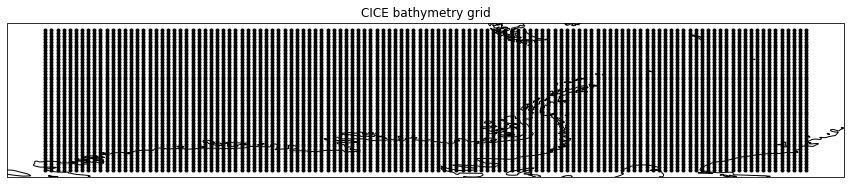

In [20]:
# Plot CICE Bathymetery grid
fig = plt.figure(figsize=(15,12))
ax  = plt.axes(projection=ccrs.PlateCarree())
lons = -cice_grid.isel(nj=slice(1,50),ni=slice(50,175)).TLON
lats = cice_grid.isel(nj=slice(1,50),ni=slice(50,175)).TLAT
plt.plot(lons,lats,transform=ccrs.PlateCarree(),marker='.',linestyle='none',color='k')
ax.coastlines()
tit_str = 'CICE bathymetry grid'.format()
plt.title(tit_str)
plt.show()
plt.close(fig)

In [19]:
cice_grid_bin = xr.open_dataset('/Users/noahday/Github/cice-dirs/input/CICE_data/grid/gx1/global_gx1.bin')
cice_grid_bin


ValueError: did not find a match in any of xarray's currently installed IO backends ['scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [36]:
# Read in ACCESS-OM2 grid, 
#cice_hist = xr.open_dataset('/Users/noahday/Github/cice-dirs/runs/test/history/iceh_ic.2005-01-01-03600.nc')
#cice_hist
#om_grid = xr.open_dataset("/Users/noahday/GitHub/cice-dirs/input/CICE_data/grid/access-om2_1deg/access-om2_1deg.nc")

om_grid = xr.open_dataset('/Users/noahday/Github/cice-dirs/input/CICE_data/grid/om2_1deg/access-om2_1deg.nc')
om_grid
#grid = Grid(cice_hist, coords={'X': {'center': 'xh', 'outer': 'xq'},
#                        'Y': {'center': 'yh', 'outer': 'yq'},
#                        'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'])


ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

## Following this ( https://gallery.pangeo.io/repos/xgcm/xgcm-examples/03_MOM6.html ) example

In [3]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/ocean_monthly_z.200301-200712.nc4'
om4p5   = xr.open_dataset(f'{dataurl}',
                          chunks={'time':1, 'z_l': 1}, drop_variables=['average_DT',
                                                                       'average_T1',
                                                                       'average_T2'],
                          engine='netcdf4')
#grid = Grid(om4p5, coords={'X': {'center': 'xh', 'outer': 'xq'},
#                            'Y': {'center': 'yh', 'outer': 'yq'},
#                            'Z': {'inner': 'z_l', 'outer': 'z_i'} }, periodic=['X'
om4p5

ValueError: unrecognized engine netcdf4 must be one of: ['scipy', 'store']

In [9]:
dataurl = 'http://35.188.34.63:8080/thredds/dodsC/OM4p5/'

ds = xr.open_dataset(f'{dataurl}/ocean_monthly_z.200301-200712.nc4',
                     chunks={'time':1, 'z_l': 1}, drop_variables=['average_DT',
                                                                  'average_T1',
                                                                  'average_T2'],
                     engine='pydap')

ValueError: unrecognized engine pydap must be one of: ['scipy', 'store']